In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor

# Feature Scaling
from sklearn.preprocessing import StandardScaler

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#import pandas_datareader.data as web
import datetime as dt

In [16]:
from stockdata import prepare_stockdata
from stock_classification import classification_drivers,stock_classifiers

# Classification Comparison Experiment

In [17]:
path = "D:\\Stock Data\\TRG.csv"
features = ['LDCP','Close']
days_ahead = -1
prp = prepare_stockdata()
df,x_train, x_test, y_train, y_test,X_df = prp.preparation_driver(path,features,days_ahead)
df.tail(10)


C:\Users\Hassan\stockdata.py:44: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))
C:\Users\Hassan\stockdata.py:79: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_df = np.array(df.drop(['Prediction'],1))


,LDCP,Close,7DayAve,15DayAve,Day_Perc_Change,Prediction
Date,,,,,,
2021-12-15,96.47,103.70,94.612857,89.654667,7.494558,107.82
2021-12-16,103.70,107.82,97.561429,90.922667,3.972999,106.43
2021-12-17,107.82,106.43,99.378571,92.189333,-1.289186,114.41
2021-12-20,106.43,114.41,102.144286,93.808000,7.497886,116.24
2021-12-21,114.41,116.24,104.972857,95.748667,1.599511,117.53
2021-12-22,116.24,117.53,108.942857,97.694000,1.109773,124.35
2021-12-23,117.53,124.35,112.925714,100.535333,5.802774,118.40
2021-12-24,124.35,118.40,115.025714,103.238000,-4.784881,112.97
2021-12-27,118.40,112.97,115.761429,105.362667,-4.586149,106.00


In [18]:
inp = [[118.40,118.41,115.02,103.23,-4.78]]
print(inp)
clf = classification_drivers()
result,lr,rf,dt,lasso_model,ridge_model = clf.cls_driver(x_train,y_train,inp)
#lasso,lasso_pred=lasso_driver(x_train,x_test,inp)
#print(lasso_pred)
print(result)

[[118.4, 118.41, 115.02, 103.23, -4.78]]
Linear Regression
 
Linear Regression Confidence :  0.9791053935032767

Random Forest
 
model confidence:  -0.2640620485719616
Mean Absolute Error: 29.90862171052632
Mean Squared Error: 1238.3390843347042
Root Mean Squared Error: 35.19004240313876

Decision Tree
 
model confidence:  -0.4569769683661551

Lasso
 
model confidence:  -0.2644372766547569

Ridge
 
model confidence:  -0.26240496348580256
                   Predicted Value
Linear Regression       116.382832
Random Forest           156.277750
Decision Tree           174.920000
Lasso                   146.391941
Ridge                   147.444085


In [9]:
sc = StandardScaler()
cls = stock_classifiers()
X_df_sc = sc.fit_transform(X_df)
rf_pred = cls.model_prediction(rf,X_df_sc)
dt_pred = cls.model_prediction(dt,X_df)
lasso_pred = cls.model_prediction(lasso_model,X_df)
ridge_pred = cls.model_prediction(ridge_model,X_df)
#print(rf_pred)
df['RandomForest'] = rf_pred
df['DecisionTree'] = dt_pred
df['Lasso'] = lasso_pred
df['Ridge'] = ridge_pred
df[['Close','Lasso','Ridge','RandomForest','DecisionTree']].tail(10)

,Close,Lasso,Ridge,RandomForest,DecisionTree
Date,,,,,
2021-12-15,103.70,142.393616,141.717963,125.79725,164.38
2021-12-16,107.82,142.393616,138.117213,165.43425,171.57
2021-12-17,106.43,142.393616,135.773514,167.28525,181.69
2021-12-20,114.41,142.393616,139.780381,119.48950,96.44
2021-12-21,116.24,142.393616,135.352168,163.24775,162.47
2021-12-22,117.53,142.393616,136.660012,168.20975,175.46
2021-12-23,124.35,142.393616,139.060166,157.92900,164.22
2021-12-24,118.40,142.393616,134.538611,114.63025,95.05
2021-12-27,112.97,142.393616,139.277409,137.81175,147.90


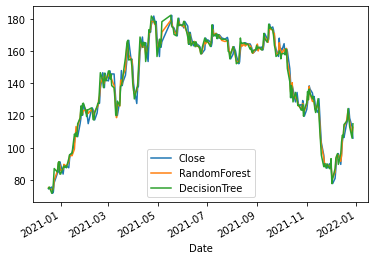

In [28]:
df['Close'].plot()
#df['Prediction'].plot()
df['RandomForest'].plot()
df['DecisionTree'].plot()
#df['15DayAve'].plot()
#df['Avg.'].plot()
plt.legend()

In [29]:
#Train the model
lr = linear_regression(x_train,y_train)
#Evaluate the model performance
lr_score(lr,x_test,y_test)

Linear Regression Confidence :  0.9638977312972541


In [25]:
inp = [[108.00,114.41,114.41,102.144286,93.80800,7.497886]]
lr_pred = model_prediction(lr,inp)
print("Predicted Next Day Value : ", lr_pred)

Predicted Next Day Value :  [116.39108299]


# Support Vector Machine Experiment

In [26]:
#Train the model
model = svm(x_train,y_train)
#Evaluate the model performance
model_score(model,x_test,y_test)

model confidence:  0.20892639903751353


0.20892639903751353

In [27]:
inp = [[108.00,114.41,114.41,102.144286,93.80800,7.497886]]
pred = model_prediction(model,inp)
print("Predicted Next Day Value : ", pred)

Predicted Next Day Value :  [138.68497199]


## Decision Tree Experiment


In [30]:
#Train the model
model = decision_tree(x_train,y_train)
#Evaluate the model performance
model_score(model,x_test,y_test)

model confidence:  0.9535625347820045


0.9535625347820045

In [31]:
inp = [[108.00,114.41,114.41,102.144286,93.80800,7.497886]]
lgr_pred = model_prediction(model,inp)
print("Predicted Next Day Value : ", lgr_pred)

Predicted Next Day Value :  [118.39]


## Random Forest Regressor Experiment

In [161]:
inp = [[108.00,114.41,114.41,102.144286,93.80800,7.497886]]
randomforest_driver(x_train,x_test,inp)

model confidence:  0.9629027651223625
Predicted Next Day Value for Random Forest :  [113.996]


array([113.996])

In [146]:
inp = [[108.00,114.41,114.41,102.144286,93.80800,7.497886]]
inp_sc = sc.transform(inp)
rf_pred = model_prediction(rf,inp)
print("Predicted Next Day Value : ", rf_pred)

Predicted Next Day Value :  [113.996]


In [147]:
y_pred=rf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.082050000000004
Mean Squared Error: 45.59479467249999
Root Mean Squared Error: 6.752391774216006


Linear Regression
 
Linear Regression Confidence :  0.9730042100202486
Linear Regression Predicted Next Day Value :  [116.39108299]

Random Forest
 
model confidence:  0.9785561255579437
Mean Absolute Error: 3.2668900000000214
Mean Squared Error: 21.044044777500105
Root Mean Squared Error: 4.587378856983594
Predicted Next Day Value for Random Forest :  [112.4945]

Decision Tree
 
model confidence:  0.9535625347820045
Decision Tree Predicted Next Day Value :  [118.39]
